In [392]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import scipy
import statistics
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
import os

In [336]:
path = os.getcwd()
#iris_df = pd.read_csv('iris_dataset_missing.csv')
iris_df = pd.read_csv(path+"\\Iris_Kaggle_PDF\\iris_train.csv")
print(iris_df.head())
iris_df_nona = iris_df.dropna()
iris_df_nona["Class"] = list(iris_df_nona.loc[:,"species"].values)
iris_df_nona["Class"]=iris_df_nona["Class"].replace("Iris-versicolor",0).replace("Iris-setosa",1).replace("Iris-virginica",2)

   sepal_length  sepal_width  petal_length  petal_width          species
0     39.123647    36.385578     10.992661    -1.828222  Iris-versicolor
1    -13.087678   -14.514781    -11.282687    12.150483  Iris-versicolor
2     42.572446    14.509085    -24.706781    -8.397154      Iris-setosa
3     86.373997   118.661487     37.445004   -35.629001   Iris-virginica
4    -25.874715   -31.654849           NaN   -70.115413  Iris-versicolor


In [347]:
iris_df_test = pd.read_csv(path+"\\Iris_Kaggle_PDF\\iris_test.csv")


,id,sepal_length,sepal_width,petal_length,petal_width
0,0,13.992446,79.111727,78.025874,-70.962613
1,1,-12.614673,-190.481607,-140.600953,-138.349674
2,2,-134.923724,91.002522,-16.786971,133.281462
3,3,121.375558,40.120738,95.965378,70.173917
4,4,-34.624681,32.757188,10.445907,-65.724076
5,5,-5.734615,-62.770326,-37.957977,6.827450
6,6,-33.845882,-18.763675,-55.005409,6.051118
7,7,-78.967535,-72.854083,-105.284258,-101.612166
8,8,118.675902,-86.206641,-26.165629,-34.914209
9,9,11.359389,-1.915487,242.069378,-62.128463


In [333]:
iris_df_nona.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,90.000000,90.000000,90.000000,90.000000
mean,5.960438,7.702363,6.245140,2.570438
std,31.857117,29.115316,27.264654,29.726939
min,-64.939919,-63.292986,-47.211576,-83.378535
25%,-14.832139,-7.792456,-11.830773,-18.545299
50%,6.935049,8.272522,5.475683,2.896371
75%,24.594973,26.639655,23.193333,23.214819
max,86.373997,118.661487,84.863246,70.661911


### The above decription suggests the presence of 

<Figure size 864x864 with 0 Axes>

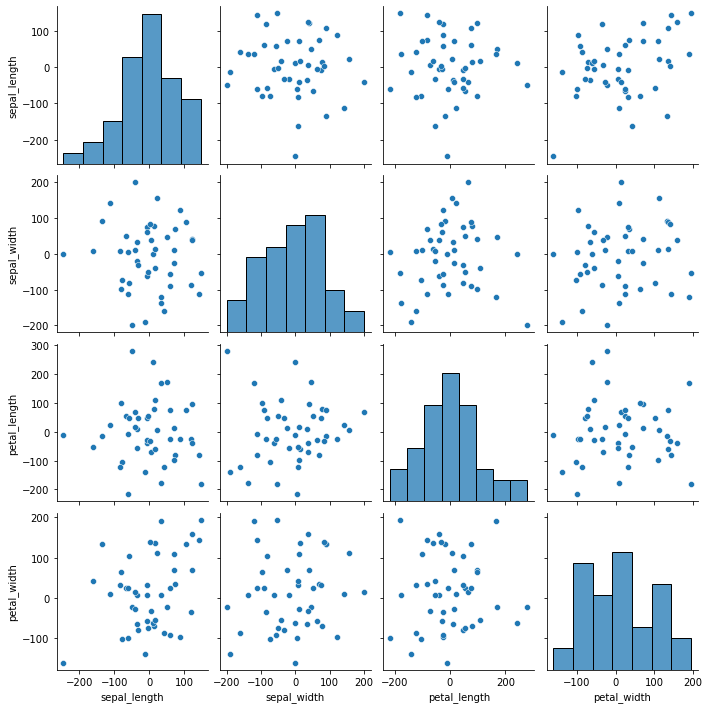

In [348]:
fig1 = plt.figure(figsize=(12,12))
#sn = sns.pairplot(iris_df_nona.drop(columns=["Class"]),hue='species', dropna=True)
sn = sns.pairplot(iris_df_test.drop(columns=["id"]), dropna=True)
#sn.savefig("CM1_Iris.png")

In [39]:
iris_df_nona.corr()
iris_df_nona["Class"] = list(iris_df_nona.loc[:,"species"].values)
iris_df_nona["Class"]=iris_df_nona["Class"].replace("Iris-versicolor",1).replace("Iris-setosa",2).replace("Iris-virginica",3)
sl = iris_df_nona.loc[:,"sepal_length"].values
sw = iris_df_nona.loc[:,"sepal_width"].values
pl = iris_df_nona.loc[:,"petal_length"].values
pw = iris_df_nona.loc[:,"petal_width"].values
sp = iris_df_nona.loc[:,"species"].values
cl = iris_df_nona.loc[:,"Class"].values

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)
sc = ax.scatter(sl, sw, pl, c=cl , marker='o', alpha=1)

In [7]:
cols = iris_df_nona.columns
for i in cols:
    try:
        print("Skew of ",i, scipy.stats.skew(iris_df_nona.loc[:,i]))
        print("Kurtosis of ",i, scipy.stats.kurtosis(iris_df_nona.loc[:,i]))
        print("Mean of ",i, statistics.mean(iris_df_nona.loc[:,i]))
        print("Variance of ",i, statistics.variance(iris_df_nona.loc[:,i]))
        print("")
    except:
        pass


Skew of  sepal_length 0.020090440198973117
Kurtosis of  sepal_length -0.23668441243041594
Mean of  sepal_length 5.960437670383189
Variance of  sepal_length 1014.8759253176348

Skew of  sepal_width 0.24512474000483028
Kurtosis of  sepal_width 1.432210998865842
Mean of  sepal_width 7.702362671266827
Variance of  sepal_width 847.7016050699484

Skew of  petal_length 0.22810529230382318
Kurtosis of  petal_length -0.2918042243731933
Mean of  petal_length 6.245140284366078
Variance of  petal_length 743.3613732584656

Skew of  petal_width -0.17070884437519035
Kurtosis of  petal_width -0.21884944704008014
Mean of  petal_width 2.570437706166672
Variance of  petal_width 883.6908882660058

Skew of  Class -0.04082986634348955
Kurtosis of  Class -1.497776954732962
Mean of  Class 2.022222222222222
Variance of  Class 0.6736579275905118



In [8]:
iris_df_nona_class1 = iris_df_nona[iris_df_nona["Class"]==1]
iris_df_nona_class2 = iris_df_nona[iris_df_nona["Class"]==2]
iris_df_nona_class3 = iris_df_nona[iris_df_nona["Class"]==3]

In [40]:
iris_df_nona_X = iris_df_nona.copy()
iris_df_nona_Y = iris_df_nona.copy()
iris_df_nona_X = iris_df_nona_X.drop(columns=["Class","species"])
iris_df_nona_Y = iris_df_nona_Y.drop(columns=["sepal_length","sepal_width","petal_length","petal_width","species"])


In [43]:
iris_df_nona_X

,sepal_length,sepal_width,petal_length,petal_width
0,39.123647,36.385578,10.992661,-1.828222
1,-13.087678,-14.514781,-11.282687,12.150483
2,42.572446,14.509085,-24.706781,-8.397154
3,86.373997,118.661487,37.445004,-35.629001
5,47.629840,-17.763561,84.863246,-54.065913
...,...,...,...,...
100,-61.011720,-4.784465,-44.665047,15.396435
101,55.017459,33.404581,10.772346,25.203533
102,49.664017,-3.597873,0.529312,-20.759957
103,6.480573,-3.048390,45.709716,-6.381167


In [33]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(iris_df_nona_X, iris_df_nona_Y, test_size = 0.2, random_state = 275)
X_train, X_val, Y_train, Y_val = sklearn.model_selection.train_test_split(X_train, Y_train, test_size = 0.2, random_state= 275)

Text(0.5, 1.0, 'KNN classifier; Iris Dataset; No data cleaning')

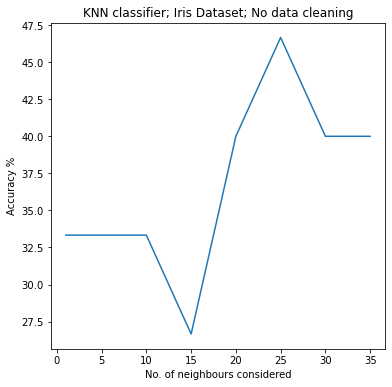

In [77]:
k_n = [1, 5, 10, 15, 20, 25, 30, 35]
score_list = []
for k in k_n:
    knn_model = KNeighborsClassifier(n_neighbors= k)
    knn_model.fit(X_train,Y_train)
    Y_val_pred = knn_model.predict(X_val)
    pred_score = sklearn.metrics.accuracy_score(Y_val, Y_val_pred, normalize=True) * 100
    score_list.append(pred_score)
fig2 = plt.figure(figsize=(6,6))
plt.plot(k_n,score_list)
plt.xlabel('No. of neighbours considered')
plt.ylabel('Accuracy %')
plt.title('KNN classifier; Iris Dataset; No data cleaning')

### One can notice that the performance of KNN classifier on the plain dataset is not very good over the given range of K values. The best performance is attained at K = 25

In [107]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return sklearn.metrics.roc_auc_score(y_test, y_pred, average='weighted')

### To compute roc curve in multiclass setting, we are using one hot encoding to encode the different classes

In [129]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(iris_df_nona_X, iris_df_nona_Y, test_size = 0.2, random_state = 275)
X_train, X_val, Y_train, Y_val = sklearn.model_selection.train_test_split(X_train, Y_train, test_size = 0.2, random_state= 275)
knn_model = KNeighborsClassifier(n_neighbors=25)
knn_model.fit(X_train,Y_train)
Y_pred = knn_model.predict(X_test)
auc_score = multiclass_roc_auc_score(Y_test,Y_pred)
aucc_score = sklearn.metrics.accuracy_score(Y_test,Y_pred)
f_score = sklearn.metrics.f1_score(Y_test, Y_pred, average='weighted')
print('AUC Score; K = 25; IRIS - No cleaning...',auc_score)
print('Accuracy; K = 25, IRIS - No cleaning...',aucc_score)
print('F-score; K = 25, IRIS - No cleaning...', f_score)

AUC Score; K = 25; IRIS - No cleaning... 0.6000000000000001
Accuracy; K = 25, IRIS - No cleaning... 0.4444444444444444
F-score; K = 25, IRIS - No cleaning... 0.4027777777777778


# Dealing with outliers

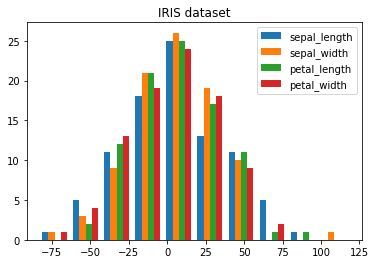

In [368]:
path = os.getcwd()
#iris_df = pd.read_csv('iris_dataset_missing.csv')
iris_df = pd.read_csv(path+"\\Iris_Kaggle_PDF\\iris_train.csv")
iris_df_X = iris_df.dropna().drop(columns=['species'])
iris_df_Y = iris_df.dropna().drop(columns=["sepal_length","sepal_width","petal_length","petal_width"])
n_bins = 10
plt.hist([iris_df_X.iloc[:,0],iris_df_X.iloc[:,1],iris_df_X.iloc[:,2], iris_df_X.iloc[:,3]],n_bins)
plt.title('IRIS dataset')
plt.legend(["sepal_length","sepal_width","petal_length","petal_width"])
plt.show()

### One can notice outliers in sepal_width, sepal_length and petal_length on either extremes of the histogram.

In [387]:
thres = 70
outlier_ = iris_df_X[iris_df_X['sepal_length']>thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)
outlier_ = iris_df_X[iris_df_X['sepal_width']>thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)
outlier_ = iris_df_X[iris_df_X['petal_length']>thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)
outlier_ = iris_df_X[iris_df_X['petal_width']>thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)
outlier_ = iris_df_X[iris_df_X['sepal_length']<-thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)
outlier_ = iris_df_X[iris_df_X['sepal_width']<-thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)
outlier_ = iris_df_X[iris_df_X['petal_width']<-thres]

iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)
outlier_ = iris_df_X[iris_df_X['petal_length']<-thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)

### We have removed the outliers that lie outside the [-70, 70] range. Having negative values in measurement of length and width does not seem to make sense. As very little information is given on how these values were measured and the unit of measurement, it is hard to take a call on whether to consider negative values or not. Moreover, since almost all the entries have atleast one negative value in them, we will try to work with negative values as such.

# Normalization
### We will perform Z-score normalization on each attribute entries to normalize the data entries by subtracting it with mean and dividing each entry by standard deviation.

In [388]:
iris_df_X_norm = iris_df_X.copy()
iris_df_X_norm['sepal_length'] = (iris_df_X.loc[:,'sepal_length'] - iris_df_X.describe().loc['mean','sepal_length'])#/iris_df_X.describe().loc['std','sepal_length']
iris_df_X_norm['sepal_width'] = (iris_df_X.loc[:,'sepal_width'] - iris_df_X.describe().loc['mean','sepal_width'])#/iris_df_X.describe().loc['std','sepal_width']
iris_df_X_norm['petal_length'] = (iris_df_X.loc[:,'petal_length'] - iris_df_X.describe().loc['mean','petal_length'])#/iris_df_X.describe().loc['std','petal_length']
iris_df_X_norm['petal_width'] = (iris_df_X.loc[:,'petal_width'] - iris_df_X.describe().loc['mean','petal_width'])#/iris_df_X.describe().loc['std','petal_width']

iris_df_Y["Class"] = list(iris_df_Y.loc[:,"species"].values)
iris_df_Y["Class"]=iris_df_Y["Class"].replace("Iris-versicolor",0).replace("Iris-setosa",1).replace("Iris-virginica",2)
iris_df_Y_norm = iris_df_Y.copy().drop(columns=["species"])
iris_df_X_norm.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,8.600000e+01,8.600000e+01,8.600000e+01,8.600000e+01
mean,4.131062e-16,-1.487182e-15,-9.707997e-16,2.891744e-16
std,3.096641e+01,2.703759e+01,2.609185e+01,2.696627e+01
min,-6.934460e+01,-7.007806e+01,-5.182149e+01,-5.815069e+01
25%,-2.020102e+01,-1.457753e+01,-1.671786e+01,-2.023390e+01
50%,1.747454e+00,1.487451e+00,-3.179935e+00,6.531845e-01
75%,1.722821e+01,1.985458e+01,1.533263e+01,1.933399e+01
max,6.235027e+01,5.107824e+01,6.100899e+01,5.752152e+01


Best K is.. 11


"\nknn_model = KNeighborsClassifier(n_neighbors=best_k,weights='distance', metric = 'euclidean')\nknn_model.fit(X_train,Y_train)\nY_pred = knn_model.predict(X_test)\nauc_score = multiclass_roc_auc_score(Y_test,Y_pred)\naucc_score = sklearn.metrics.accuracy_score(Y_test,Y_pred, normalize=True)\nf_score = sklearn.metrics.f1_score(Y_test, Y_pred, average='weighted')\nprint('AUC Score; K = 15; IRIS  ...',auc_score)\nprint('Accuracy; K = 15, IRIS  ...',aucc_score)\nprint('F-score; K = 15, IRIS ...', f_score)"

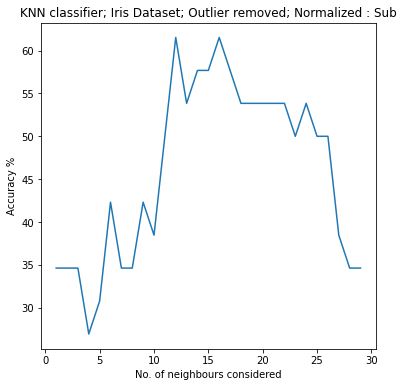

In [396]:
X_train, X_val, Y_train, Y_val = sklearn.model_selection.train_test_split(iris_df_X_norm, iris_df_Y_norm, test_size = 0.3, random_state = 275)
#X_test, X_val, Y_test, Y_val = sklearn.model_selection.train_test_split(X_test, Y_test, test_size = 0.5, random_state= 275)
k_n = range(1,30)
score_list = []
for k in k_n:
    knn_model = KNeighborsClassifier(n_neighbors= k,weights='distance', metric = 'minkowski', p=4)
    knn_model.fit(X_train,Y_train)
    Y_val_pred = knn_model.predict(X_val)
    pred_score = sklearn.metrics.accuracy_score(Y_val, Y_val_pred, normalize=True) * 100
    score_list.append(pred_score)
fig2 = plt.figure(figsize=(6,6))
plt.plot(k_n,score_list)
plt.xlabel('No. of neighbours considered')
plt.ylabel('Accuracy %')
plt.title('KNN classifier; Iris Dataset; Outlier removed; Normalized : Sub')
best_k = score_list.index(max(score_list))
print('Best K is..',best_k)
"""
knn_model = KNeighborsClassifier(n_neighbors=best_k,weights='distance', metric = 'euclidean')
knn_model.fit(X_train,Y_train)
Y_pred = knn_model.predict(X_test)
auc_score = multiclass_roc_auc_score(Y_test,Y_pred)
aucc_score = sklearn.metrics.accuracy_score(Y_test,Y_pred, normalize=True)
f_score = sklearn.metrics.f1_score(Y_test, Y_pred, average='weighted')
print('AUC Score; K = 15; IRIS  ...',auc_score)
print('Accuracy; K = 15, IRIS  ...',aucc_score)
print('F-score; K = 15, IRIS ...', f_score)"""

In [397]:

knn_model = KNeighborsClassifier(n_neighbors= 11,weights='distance', metric = 'minkowski', p=4)
knn_model.fit(X_train,Y_train)
iris_df_test = pd.read_csv(path+"\\Iris_Kaggle_PDF\\iris_test.csv")
iris_df_test_norm = iris_df_test.copy()
iris_df_test_norm['sepal_length'] = (iris_df_test.loc[:,'sepal_length'] - iris_df_X.describe().loc['mean','sepal_length'])#/iris_df_X.describe().loc['std','sepal_length']
iris_df_test_norm['sepal_width'] = (iris_df_test.loc[:,'sepal_width'] - iris_df_X.describe().loc['mean','sepal_width'])#/iris_df_X.describe().loc['std','sepal_width']
iris_df_test_norm['petal_length'] = (iris_df_test.loc[:,'petal_length'] - iris_df_X.describe().loc['mean','petal_length'])#/iris_df_X.describe().loc['std','petal_length']
iris_df_test_norm['petal_width'] = (iris_df_test.loc[:,'petal_width'] - iris_df_X.describe().loc['mean','petal_width'])#/iris_df_X.describe().loc['std','petal_width']

iris_df_prediction = iris_df_test.copy().drop(columns = ["sepal_length","sepal_width","petal_length","petal_width"])
iris_df_prediction["pred"] = knn_model.predict(iris_df_test_norm.drop(columns=["id"]))

In [398]:
species = []
for i in range(len(iris_df_prediction)):
    if iris_df_prediction.loc[i,"pred"] == 0:
        species.append("Iris-versicolor")
    if iris_df_prediction.loc[i,"pred"] == 1:
        species.append("Iris-setosa")
    if iris_df_prediction.loc[i,"pred"] == 2:
        species.append("Iris-virginica")
iris_df_prediction["species"] = species
iris_df_prediction.drop(columns=["pred"], inplace=True)
iris_df_prediction.to_csv(path+"\\Iris_Kaggle_PDF\\iris_preds.csv", index= False)